# Decoding UPI Transactions: Behavioral & Adoption Trends 2024

### This project conducts an in-depth analysis of 2.5 lakh UPI transactions from 2024 to uncover user behaviour patterns, transaction dynamics (P2P vs P2M), peak usage periods, and bank-wise adoption trends. which factors influence users to complete or abandon transactions? Why do certain banks or user segments exhibit higher engagement? 
### By exploring these questions, actionable insights are drived to help digital payment platforms enhance user experience, optimize transaction completion, and drive greater adoption across diverse user segments.

In [1]:
# Dataset Link: https://www.kaggle.com/datasets/skullagos5246/upi-transactions-2024-dataset/data

In [2]:
## Data handling
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

In [3]:
df = pd.read_csv('upi_transactions_2024.csv')

#### Dataset Overview:
#### This dataset captures global layoffs from 2020 to April 2025, covering multiple industries, company stages, and countries. It provides insights into workforce reductions, allowing us to explore patterns across time, geography, industry, and funding levels.
#### Dataset Source: Kaggle / Public dataset
#### Total Records: 4,150
#### Columns: 11
#### Key features: date, total layoffs, % layoffs, country, location, industry, company, stage, funds raised

In [4]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,08-10-2024 15:17,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,11-04-2024 06:56,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,02-04-2024 13:27,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,07-01-2024 10:09,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,23-01-2024 19:04,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


In [5]:
df.shape

(250000, 17)

In [6]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [8]:
df.describe()

,amount (INR),fraud_flag,hour_of_day,is_weekend
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,1311.756036,0.001920,14.681032,0.285348
std,1848.059224,0.043776,5.188304,0.451581
min,10.000000,0.000000,0.000000,0.000000
25%,288.000000,0.000000,11.000000,0.000000
50%,629.000000,0.000000,15.000000,0.000000
75%,1596.000000,0.000000,19.000000,1.000000
max,42099.000000,1.000000,23.000000,1.000000


In [9]:
df.isnull().sum()

transaction id        0
timestamp             0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_age_group      0
receiver_age_group    0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
hour_of_day           0
day_of_week           0
is_weekend            0
dtype: int64

In [10]:
## checking unique values

for col in df.columns:
    print(col, ':', df[col].nunique())

transaction id : 250000
timestamp : 183932
transaction type : 4
merchant_category : 10
amount (INR) : 10355
transaction_status : 2
sender_age_group : 5
receiver_age_group : 5
sender_state : 10
sender_bank : 8
receiver_bank : 8
device_type : 3
network_type : 4
fraud_flag : 2
hour_of_day : 24
day_of_week : 7
is_weekend : 2


# Data Cleaning and Preposition

### Checking Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

### Data Standardization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [13]:
df.fraud_flag.unique()

array([0, 1])

In [14]:
## stripping whitespace from string columns

for col in df.select_dtypes(include= 'object').columns:
    df[col] = df[col].str.strip()

In [15]:
df['timestamp'] = df['timestamp'].astype(str).str.strip()

In [16]:
## Converting timestamp to datetime

df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [17]:
df.sender_age_group.unique()

array(['26-35', '36-45', '46-55', '56+', '18-25'], dtype=object)

In [18]:
df['sender_age_group'].value_counts(dropna = False)

sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: count, dtype: int64

In [19]:
age_order = ['18-25','26-35','36-45','46-55','56+']

In [20]:
df['sender_age_group'] = pd.Categorical(df['sender_age_group'], categories = age_order, ordered = True)

In [21]:
df['sender_age_group_code'] = df['sender_age_group'].cat.codes

In [22]:
df['sender_age_group_code'].head(10)

0    1
1    1
2    1
3    1
4    1
5    2
6    2
7    3
8    3
9    3
Name: sender_age_group_code, dtype: int8

In [23]:
df['sender_age_group'].unique()

['26-35', '36-45', '46-55', '56+', '18-25']
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56+']

In [24]:
df.receiver_age_group.unique()

array(['18-25', '26-35', '36-45', '46-55', '56+'], dtype=object)

In [25]:
df['receiver_age_group'].value_counts(dropna = False)

receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: count, dtype: int64

In [26]:
age_order = ['18-25','26-35','36-45','46-55','56+']

In [27]:
df['receiver_age_group'] = pd.Categorical(df['receiver_age_group'], categories = age_order, ordered = True)

In [28]:
df['receiver_age_group_code'] = df['receiver_age_group'].cat.codes

In [29]:
df['receiver_age_group_code'].head(10)

0    0
1    1
2    2
3    1
4    0
5    0
6    0
7    2
8    2
9    0
Name: receiver_age_group_code, dtype: int8

In [30]:
df['receiver_age_group'].unique()

['18-25', '26-35', '36-45', '46-55', '56+']
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56+']

In [31]:
df.head(2)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code
0,TXN0000000001,NaT,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0
1,TXN0000000002,NaT,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1


In [32]:
df['transaction_status'].unique()

array(['SUCCESS', 'FAILED'], dtype=object)

In [33]:
df['day_of_week'].unique()

array(['Tuesday', 'Thursday', 'Sunday', 'Monday', 'Saturday', 'Wednesday',
       'Friday'], dtype=object)

In [34]:
df['fraud_flag'].unique()

array([0, 1])

In [35]:
df['is_weekend'].unique()

array([0, 1])

In [36]:
df['sender_bank'].unique()

array(['Axis', 'ICICI', 'Yes Bank', 'IndusInd', 'HDFC', 'Kotak', 'SBI',
       'PNB'], dtype=object)

In [37]:
apps = ['PhonePe','Gpay','Paytm']

In [38]:
bank_app_map = {'Axis': 'PhonePe',
                'ICICI': 'GPay',
                'Yes Bank': 'Paytm',
                'IndusInd': 'PayPal',
                'HDFC': 'PhonePe',
                'Kotak': 'GPay',
                'SBI': 'Paytm',
                'PNB': 'PayPal'}

In [39]:
df['upi_app'] = df['sender_bank'].map(bank_app_map)

In [40]:
df['upi_app'].isnull().sum()

np.int64(0)

In [41]:
df['upi_app'].value_counts()

upi_app
Paytm      87553
PhonePe    62527
PayPal     50119
GPay       49801
Name: count, dtype: int64

In [42]:
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,TXN0000000001,NaT,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,TXN0000000002,NaT,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,TXN0000000003,NaT,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,TXN0000000004,NaT,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,TXN0000000005,NaT,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


### Removing Unnecessary Columns

In [43]:
df['timestamp'].isna().sum()

np.int64(250000)

In [44]:
df.isnull().sum()

transaction id                  0
timestamp                  250000
transaction type                0
merchant_category               0
amount (INR)                    0
transaction_status              0
sender_age_group                0
receiver_age_group              0
sender_state                    0
sender_bank                     0
receiver_bank                   0
device_type                     0
network_type                    0
fraud_flag                      0
hour_of_day                     0
day_of_week                     0
is_weekend                      0
sender_age_group_code           0
receiver_age_group_code         0
upi_app                         0
dtype: int64

In [45]:
df.drop(columns = ['timestamp'], inplace = True)

In [46]:
df.head(2)

,transaction id,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,TXN0000000001,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,TXN0000000002,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay


In [47]:
df.drop(columns = ['transaction id'], inplace = True)

In [48]:
df.head(2)

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay


# EDA with Pandas and Visualization

In [49]:
df.to_csv('upi_transactions_cleaned.csv', index = False)

In [50]:
status_counts = df['transaction_status'].value_counts()

In [51]:
status_counts

transaction_status
SUCCESS    237624
FAILED      12376
Name: count, dtype: int64

In [52]:
status_percentage = df['transaction_status'].value_counts(normalize = True) * 100

In [53]:
status_percentage

transaction_status
SUCCESS    95.0496
FAILED      4.9504
Name: proportion, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\4265241927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transaction_status', palette='coolwarm', ax=ax)


Text(0, 0.5, 'Number of Transactions')

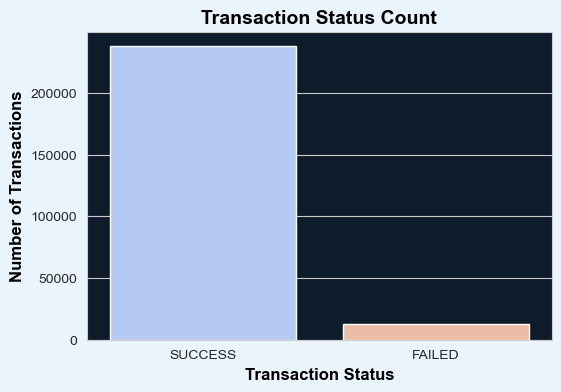

In [54]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
fig.patch.set_facecolor('#eaf4fc') 
ax.set_facecolor('#0d1b2a')         

sns.countplot(data=df, x='transaction_status', palette='coolwarm', ax=ax)
ax.set_title('Transaction Status Count', fontsize=14, fontweight='bold', color='black')
ax.set_xlabel('Transaction Status', fontsize=12, fontweight='bold', color='black')
ax.set_ylabel('Number of Transactions', fontsize=12, fontweight='bold', color='black')

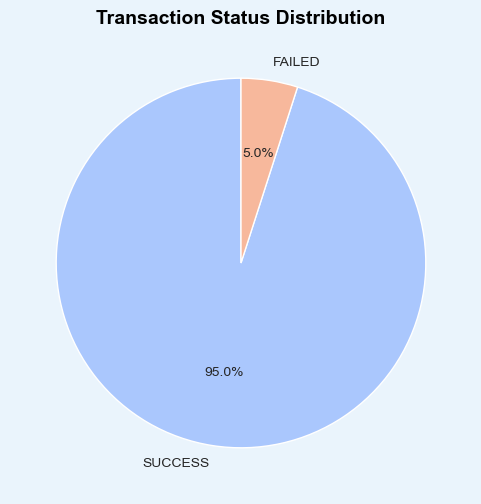

In [55]:
fig, ax = plt.subplots(figsize=(6,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')

ax.pie(status_percentage, labels=status_percentage.index, autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette("coolwarm", len(status_percentage)))
ax.set_title('Transaction Status Distribution', fontsize=14, fontweight='bold', color='black')
plt.savefig('Transaction_Status_Distribution')

In [56]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [57]:
df['fraud_flag'].unique()

array([0, 1])

In [58]:
fraud_counts = df['fraud_flag'].value_counts()

In [59]:
fraud_counts

fraud_flag
0    249520
1       480
Name: count, dtype: int64

In [60]:
fraud_percentage = df['fraud_flag'].value_counts(normalize = True) * 100

In [61]:
fraud_percentage

fraud_flag
0    99.808
1     0.192
Name: proportion, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\4064975022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='fraud_flag', palette = 'coolwarm')


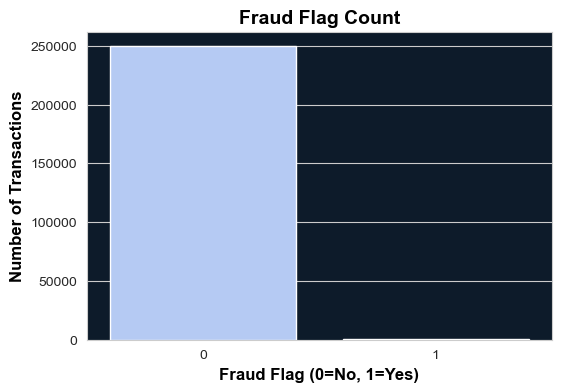

In [62]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')
fig.patch.set_facecolor('#eaf4fc') 
ax.set_facecolor('#0d1b2a')         

sns.countplot(data=df, x='fraud_flag', palette = 'coolwarm')
plt.title('Fraud Flag Count', fontsize=14, fontweight='bold', color='black')
plt.xlabel('Fraud Flag (0=No, 1=Yes)', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Number of Transactions', fontsize=12, fontweight='bold', color='black')
plt.show()

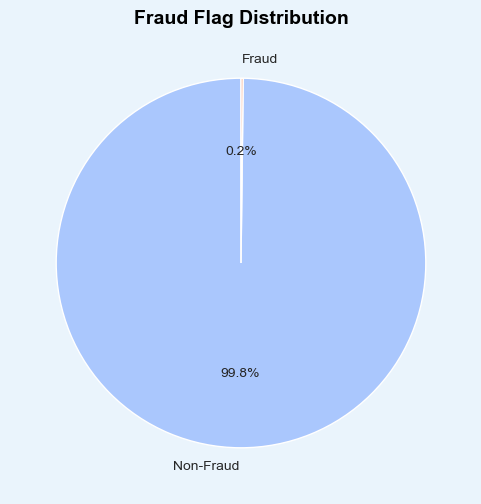

In [63]:
plt.figure(figsize=(6,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
plt.pie(fraud_percentage, labels=['Non-Fraud','Fraud'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("coolwarm", len(fraud_percentage)))
plt.title('Fraud Flag Distribution', fontsize=14, fontweight='bold', color='black')
plt.savefig('Fraud_Flag_Distribution')

In [64]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [65]:
df['transaction type'].unique()

array(['P2P', 'P2M', 'Bill Payment', 'Recharge'], dtype=object)

In [66]:
df['transaction type'].value_counts()

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: count, dtype: int64

In [67]:
# Crosstab counts
ct = pd.crosstab(df['transaction_status'], df['fraud_flag'])
ct

fraud_flag,0,1
transaction_status,,
FAILED,12355,21
SUCCESS,237165,459


In [68]:
# Row percentage (fraud % per status)
ct_pct = pd.crosstab(df['transaction_status'], df['fraud_flag'], normalize='index') * 100
ct_pct.round(2)

fraud_flag,0,1
transaction_status,,
FAILED,99.83,0.17
SUCCESS,99.81,0.19


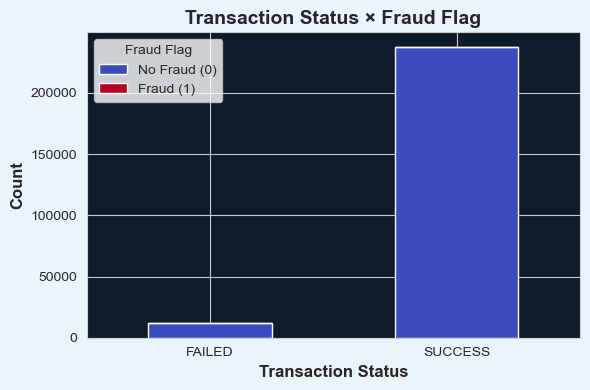

In [69]:
ax = ct.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(6,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")  

plt.title('Transaction Status × Fraud Flag', fontsize=14, fontweight='bold')
plt.xlabel('Transaction Status', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Fraud Flag', labels=['No Fraud (0)', 'Fraud (1)']) 

plt.tight_layout()
plt.savefig('Transaction_Status_x_Fraud_Flag')

In [70]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [71]:
df['transaction type'].unique()

array(['P2P', 'P2M', 'Bill Payment', 'Recharge'], dtype=object)

In [72]:
type_counts = df['transaction type'].value_counts()

In [73]:
type_counts

transaction type
P2P             112445
P2M              87660
Bill Payment     37368
Recharge         12527
Name: count, dtype: int64

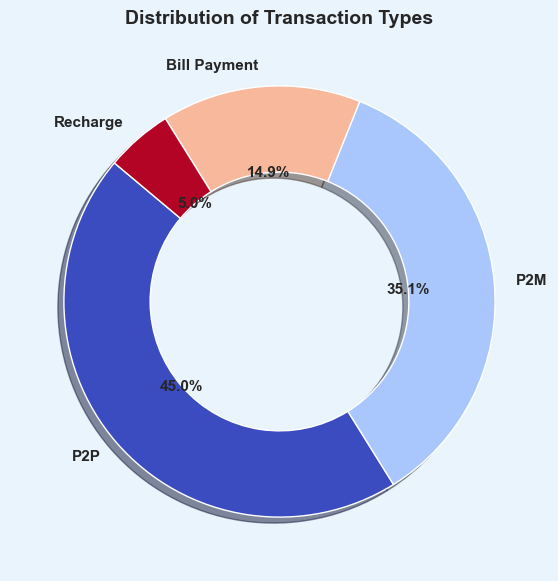

In [74]:
fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(aspect="equal"))
ax.set_facecolor("#0d1b2a")  
fig.set_facecolor("#eaf4fc")  

wedges, texts, autotexts = ax.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,   
    colors=plt.cm.coolwarm(np.linspace(0,1,len(type_counts))),
    wedgeprops=dict(width=0.4, edgecolor='w')
)

plt.setp(autotexts, size=11, weight="bold")
plt.setp(texts, size=11, weight="bold")

plt.title("Distribution of Transaction Types", fontsize=14, fontweight="bold")
plt.savefig('Distribution_of_Transaction_Types')

In [75]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [76]:
df['merchant_category'].unique()

array(['Entertainment', 'Grocery', 'Fuel', 'Shopping', 'Food', 'Other',
       'Utilities', 'Transport', 'Healthcare', 'Education'], dtype=object)

In [77]:
merchant_counts = df['merchant_category'].value_counts()

In [78]:
merchant_counts

merchant_category
Grocery          49966
Food             37464
Shopping         29872
Fuel             25063
Other            24828
Utilities        22338
Transport        20105
Entertainment    20103
Healthcare       12663
Education         7598
Name: count, dtype: int64

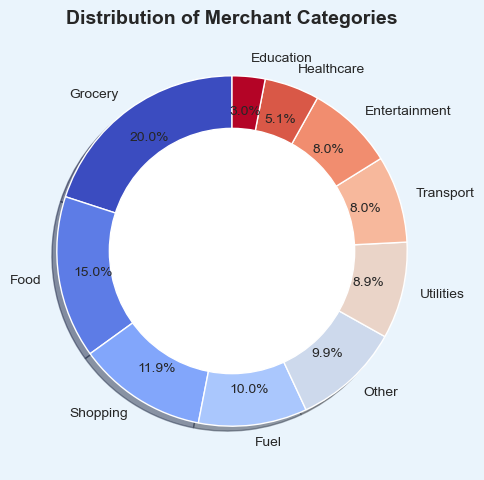

In [79]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

wedges, texts, autotexts = ax.pie(
    merchant_counts,
    labels = merchant_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8,
    colors=plt.cm.coolwarm(np.linspace(0,1,len(merchant_counts))),
    shadow=True
)

centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.title("Distribution of Merchant Categories", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig('Distribution_of_Merchant_Categories')

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\477009945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merchant_counts.index, y=merchant_counts.values, palette='coolwarm_r')


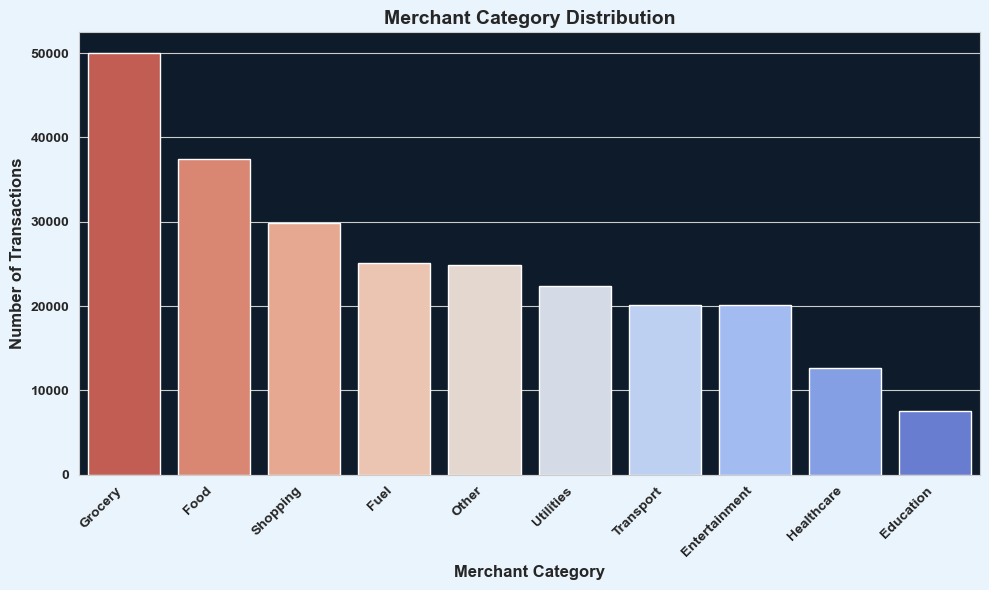

In [80]:
plt.figure(figsize=(10,6))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=merchant_counts.index, y=merchant_counts.values, palette='coolwarm_r')
plt.title("Merchant Category Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Merchant Category", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Merchant_Category_Distribution')

In [81]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [82]:
df['sender_age_group'].unique()

['26-35', '36-45', '46-55', '56+', '18-25']
Categories (5, object): ['18-25' < '26-35' < '36-45' < '46-55' < '56+']

In [83]:
sender_age = df['sender_age_group'].value_counts()

In [84]:
sender_age

sender_age_group
26-35    87432
36-45    62873
18-25    62345
46-55    24841
56+      12509
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\3114407124.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sender_age.index, y=sender_age.values, palette='coolwarm_r')


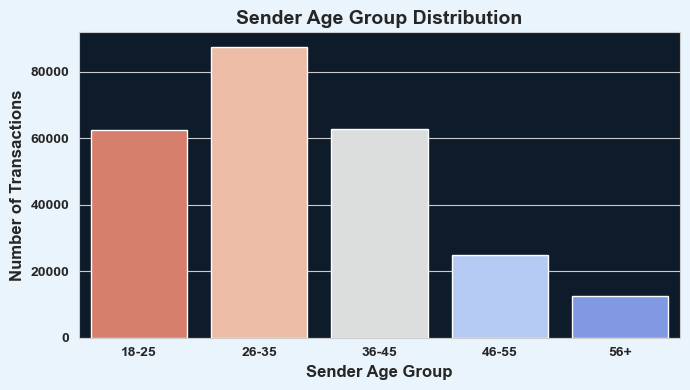

In [85]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=sender_age.index, y=sender_age.values, palette='coolwarm_r')
plt.title("Sender Age Group Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sender Age Group", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Sender_Age_Group_Distribution')

In [86]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [87]:
receiver_age = df['receiver_age_group'].value_counts()

In [88]:
receiver_age

receiver_age_group
26-35    87864
18-25    62611
36-45    62151
46-55    24823
56+      12551
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\1678924549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receiver_age.index, y=receiver_age.values, palette='coolwarm_r')


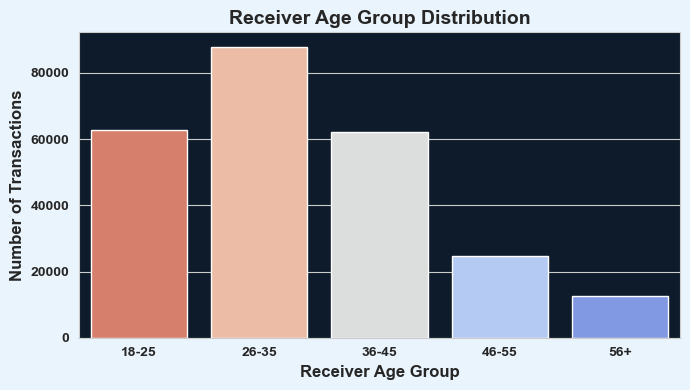

In [89]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=receiver_age.index, y=receiver_age.values, palette='coolwarm_r')
plt.title("Receiver Age Group Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Receiver Age Group", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Receiver_Age_Group_Distribution')

In [90]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [91]:
df['amount (INR)'].unique()

array([  868,  1011,   477, ..., 14456, 11576,  9505], shape=(10355,))

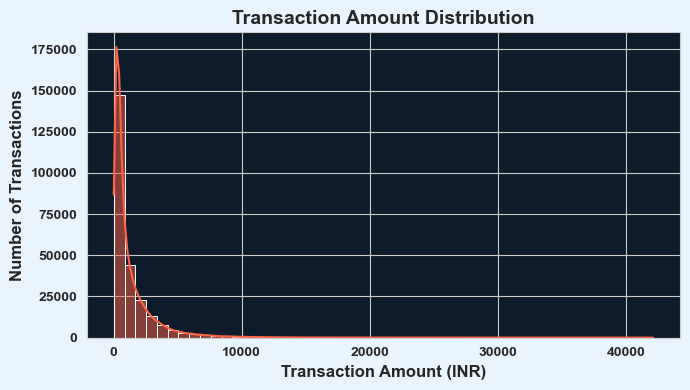

In [92]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.histplot(df['amount (INR)'], bins=50, kde=True, color='tomato') 
plt.title("Transaction Amount Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount (INR)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Transaction_Amount_Distribution')

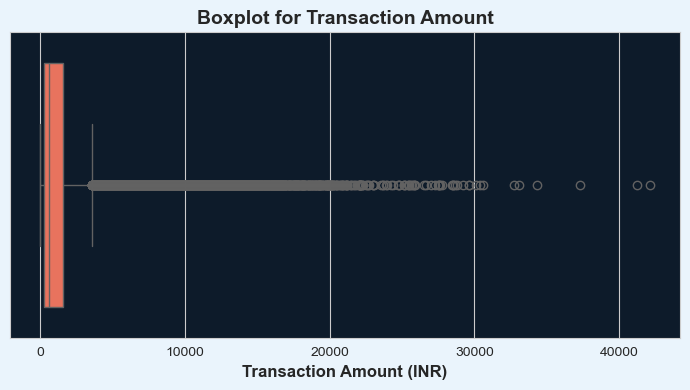

In [93]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['amount (INR)'], color='tomato')

# Title & labels
plt.title("Boxplot for Transaction Amount", fontsize=14, fontweight='bold')
plt.xlabel("Transaction Amount (INR)", fontsize=12, fontweight='bold')

# Background colors
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Boxplot_for_Transaction_Amount')

In [94]:
## Log-transform to handle outliers
## log1p handles zero values

amount_log = np.log1p(df['amount (INR)'])

In [95]:
amount_log

0         6.767343
1         6.919684
2         6.169611
3         7.932003
4         6.898715
            ...   
249995    5.924256
249996    7.613819
249997    6.150603
249998    5.652489
249999    6.276643
Name: amount (INR), Length: 250000, dtype: float64

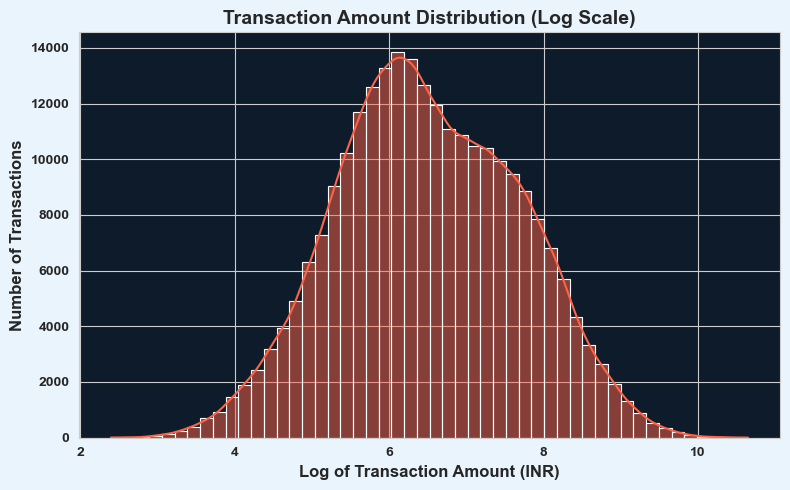

In [96]:
plt.figure(figsize=(8,5))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.histplot(amount_log, bins=50, kde=True, color='tomato')
plt.title("Transaction Amount Distribution (Log Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Log of Transaction Amount (INR)", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Transaction_Amount_Distribution_with_Log')

In [97]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [98]:
df['sender_state'].unique()

array(['Delhi', 'Uttar Pradesh', 'Karnataka', 'Telangana', 'Maharashtra',
       'Gujarat', 'Rajasthan', 'Tamil Nadu', 'West Bengal',
       'Andhra Pradesh'], dtype=object)

In [101]:
state_counts = df['sender_state'].value_counts()

In [102]:
state_counts

sender_state
Maharashtra       37427
Uttar Pradesh     30125
Karnataka         29756
Tamil Nadu        25367
Delhi             24870
Telangana         22435
Gujarat           20061
Andhra Pradesh    20006
Rajasthan         19981
West Bengal       19972
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\2396496747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm_r')


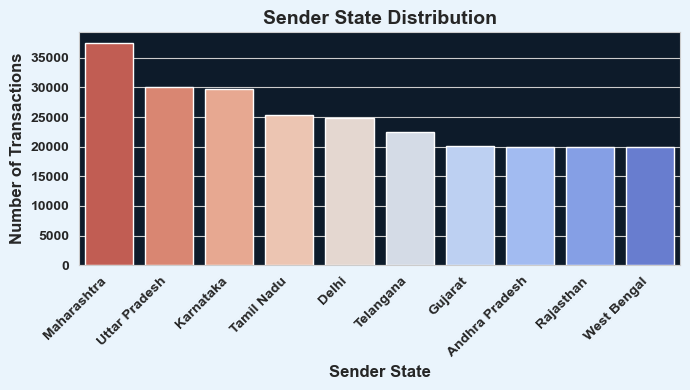

In [105]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=state_counts.index, y=state_counts.values, palette='coolwarm_r')
plt.title("Sender State Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sender State", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Sender_State_Distribution')

In [106]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [107]:
df['sender_bank'].unique()

array(['Axis', 'ICICI', 'Yes Bank', 'IndusInd', 'HDFC', 'Kotak', 'SBI',
       'PNB'], dtype=object)

In [108]:
sender_bank_counts = df['sender_bank'].value_counts()

In [109]:
sender_bank_counts

sender_bank
SBI         62693
HDFC        37485
ICICI       29769
IndusInd    25173
Axis        25042
PNB         24946
Yes Bank    24860
Kotak       20032
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\641695852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sender_bank_counts.index, y=sender_bank_counts.values, palette='coolwarm_r')


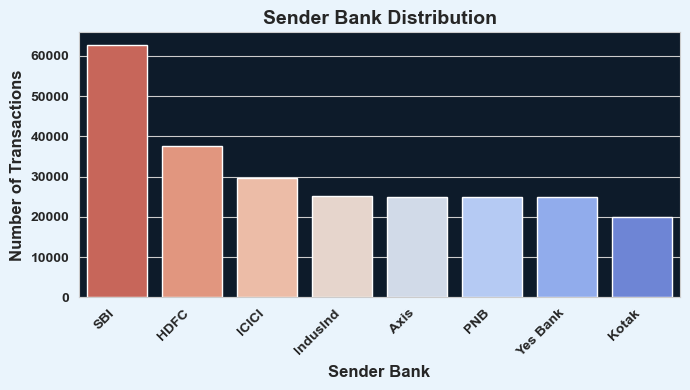

In [112]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=sender_bank_counts.index, y=sender_bank_counts.values, palette='coolwarm_r')
plt.title("Sender Bank Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Sender Bank", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Sender_Bank_Distribution')

In [114]:
receiver_bank_counts = df['receiver_bank'].value_counts()

In [115]:
receiver_bank_counts

receiver_bank
SBI         62378
HDFC        37651
ICICI       29944
IndusInd    25086
Yes Bank    25009
Axis        24992
PNB         24802
Kotak       20138
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\2725036193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=receiver_bank_counts.index, y=receiver_bank_counts.values, palette='coolwarm_r')


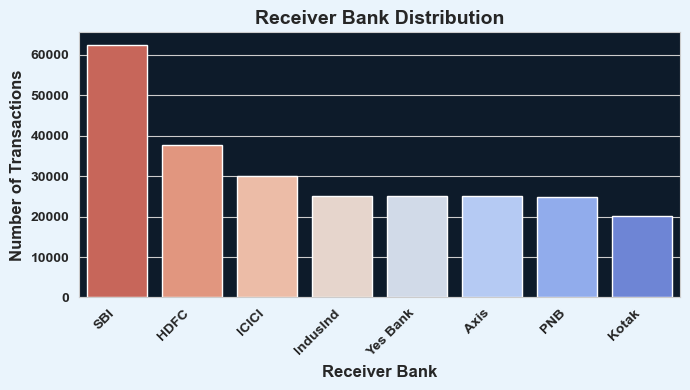

In [116]:
plt.figure(figsize=(7,4))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=receiver_bank_counts.index, y=receiver_bank_counts.values, palette='coolwarm_r')
plt.title("Receiver Bank Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Receiver Bank", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Receiver_Bank_Distribution')

In [117]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [118]:
hour_counts = df['hour_of_day'].value_counts().sort_index()

In [121]:
hour_counts.head()

hour_of_day
0    3388
1    2244
2    1685
3    1314
4    1247
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\861417953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm_r')


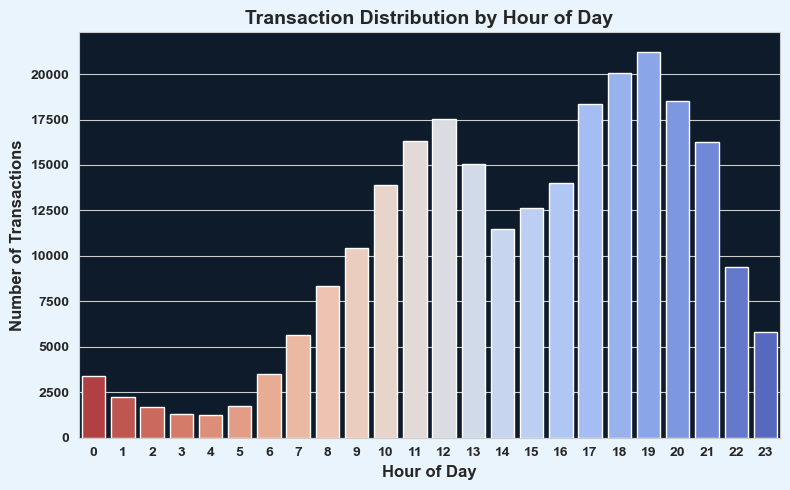

In [128]:
plt.figure(figsize=(8,5))
plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='coolwarm_r')
plt.title("Transaction Distribution by Hour of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Transaction_Distribution_by_Hour_of_Day')

In [129]:
## Crosstab for hour_of_day x transaction_status

hour_status = pd.crosstab(df['hour_of_day'], df['transaction_status'])

In [131]:
hour_status.head()

transaction_status,FAILED,SUCCESS
hour_of_day,,
0,182,3206
1,120,2124
2,87,1598
3,66,1248
4,64,1183


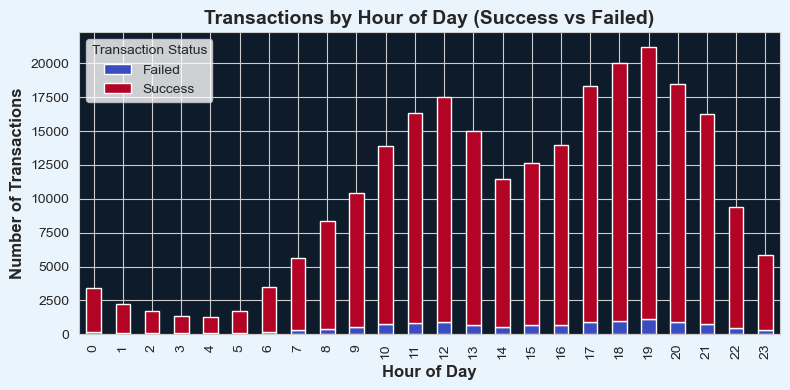

In [136]:
ax = hour_status.plot(kind='bar', stacked=True, figsize=(8,4), 
                      colormap='coolwarm')

plt.title("Transactions by Hour of Day (Success vs Failed)", fontsize=14, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')
plt.legend(title="Transaction Status", labels=['Failed','Success'])

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.tight_layout()
plt.savefig('Transactions_Status_by_Hour_of_Day')

In [137]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [138]:
df['day_of_week'].value_counts()

day_of_week
Monday       36495
Sunday       36003
Wednesday    35700
Tuesday      35540
Friday       35496
Thursday     35432
Saturday     35334
Name: count, dtype: int64

In [139]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [141]:
## Crosstab for day_of_week x transaction_status

day_status = pd.crosstab(df['day_of_week'], df['transaction_status']).reindex(order)

In [142]:
day_status

transaction_status,FAILED,SUCCESS
day_of_week,,
Monday,1810,34685
Tuesday,1702,33838
Wednesday,1781,33919
Thursday,1757,33675
Friday,1694,33802
Saturday,1797,33537
Sunday,1835,34168


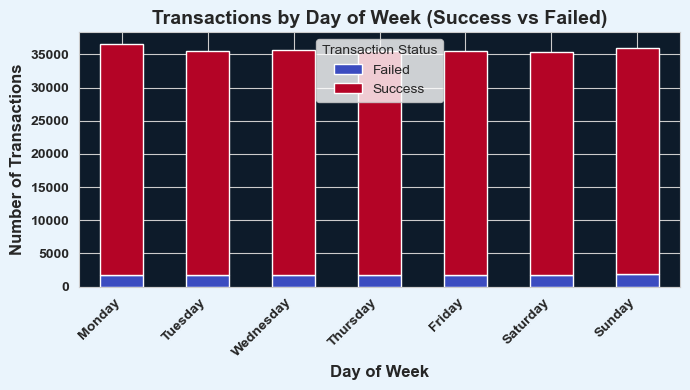

In [147]:
ax = day_status.plot(kind='bar', stacked=True, figsize=(7,4),
                     colormap='coolwarm')

plt.gca().set_facecolor("#0d1b2a")
plt.gcf().set_facecolor("#eaf4fc")

plt.title("Transactions by Day of Week (Success vs Failed)", fontsize=14, fontweight='bold')
plt.xlabel("Day of Week", fontsize=12, fontweight='bold')
plt.ylabel("Number of Transactions", fontsize=12, fontweight='bold')
plt.legend(title="Transaction Status", labels=['Failed','Success'])

plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('Transaction_Status_by_Day_of_week')

In [152]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [154]:
weekend_counts = df['is_weekend'].value_counts()

In [155]:
weekend_counts

is_weekend
0    178663
1     71337
Name: count, dtype: int64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_27840\2974277435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


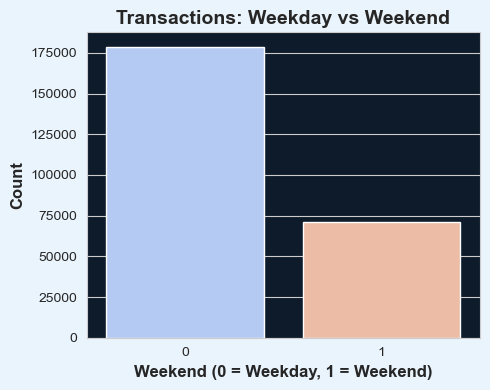

In [159]:
fig, ax = plt.subplots(figsize=(5,4))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

sns.barplot(
    x=weekend_counts.index,
    y=weekend_counts.values,
    palette="coolwarm",
    ax=ax
)
ax.set_title("Transactions: Weekday vs Weekend", fontsize=14, fontweight="bold")
ax.set_xlabel("Weekend (0 = Weekday, 1 = Weekend)", fontsize=12, fontweight="bold")
ax.set_ylabel("Count", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.savefig('Transactions_Weekday_vs_Weekend')

In [162]:
weekend_pct = weekend_counts / weekend_counts.sum() * 100
weekend_pct

is_weekend
0    71.4652
1    28.5348
Name: count, dtype: float64

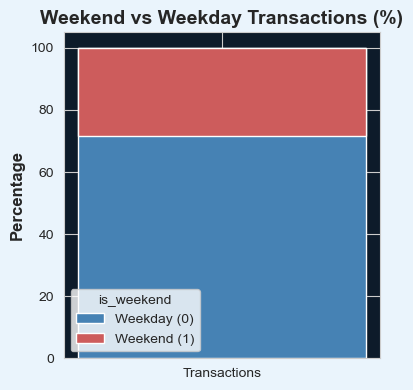

In [165]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

ax.bar(["Transactions"],                
       [100],                           
       color="#4682B4",                
       label="Weekday (0)")

ax.bar( ["Transactions"],
        [weekend_pct[1]],              
        bottom=[weekend_pct[0]],         
        color="#CD5C5C",
        label="Weekend (1)")

ax.set_title("Weekend vs Weekday Transactions (%)", fontsize=14, fontweight="bold")
ax.set_ylabel("Percentage", fontsize=12, fontweight="bold")
ax.legend(title="is_weekend")

plt.tight_layout()
plt.savefig('Weekend_vs_Weekday_Transactions_pct')

In [160]:
df.head()

,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend,sender_age_group_code,receiver_age_group_code,upi_app
0,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0,1,0,PhonePe
1,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0,1,1,GPay
2,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0,1,2,Paytm
3,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1,1,1,GPay
4,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0,1,0,PhonePe


In [166]:
upi_counts = df['upi_app'].value_counts()

In [167]:
upi_counts

upi_app
Paytm      87553
PhonePe    62527
PayPal     50119
GPay       49801
Name: count, dtype: int64

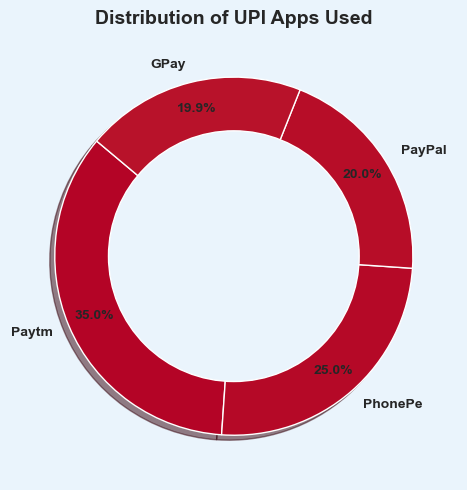

In [170]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("#0d1b2a")
fig.set_facecolor("#eaf4fc")

wedges, texts, autotexts = ax.pie(
    upi_counts,
    labels=upi_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,  
    shadow=True,       
    colors=plt.cm.coolwarm_r(range(len(upi_counts)))
)

centre_circle = plt.Circle((0,0),0.70,fc='#eaf4fc')
fig.gca().add_artist(centre_circle)
plt.title("Distribution of UPI Apps Used", fontsize=14, fontweight="bold")

for text in texts:
    text.set_fontweight("bold")
for autotext in autotexts:
    autotext.set_fontweight("bold")

plt.tight_layout()
plt.show()